In [476]:
# importação do pandas para trabalhar com calcúlos no modelo
import numpy as np

# importação do pandas para realizar a analisse dos dados
import pandas as pd

from IPython.display import display

# biblioteca do panda com o objetivo de ler CSV´s
from pandas import read_csv

# bilioteca do para manpulação de variaveis de hora
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pylab import rcParams

import visuals as vs

import warnings
import itertools

# gráficos gerados sejam mostrados no notebook e não em uma nova janela
%matplotlib inline

# definição do tipo de estilo dos gráficos gerados pelo matplotlib
plt.style.use('bmh')

# importação da bilioteca relativedelt para trabalhar com mamipulação de datas
from dateutil.relativedelta import relativedelta

# importação da função para trabalhar com o statsmodels no modelo de time series forecasting
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

## Escolhi o dataset Shanghai license plate bidding price prediction para construir o meu modelo do capstone. Esse é um dataset que pertence ao Kaggle.

O aumento da propriedade e uso de automóveis na China nas últimas duas décadas aumentou o consumo de energia, piora a poluição do ar e congestionamento exacerbado. O governo de Xangai adotou um sistema de leilão para limitar o número de placas emitidas para cada mês. O conjunto de dados contém dados históricos de leilões de janeiro de 2002 a outubro de 2017.

como funciona o sistema de leilão: um preço inicial é dado no início do leilão, os licitantes só podem oferecer até 3 vezes por cada leilão e só podem marcar para cima ou para baixo dentro de 300 CNY (aproximadamente 46 USD) por cada lance. No final de cada leilão, apenas o n superior (número de placas que serão emitidas para o mês) receberá as placas de licença ao custo de suas propostas. A oferta n. ° será o preço mais baixo do mês. Por favor, note que os leilões são realizados on-line e cada licitante não poderá ver outros lances.

Colunas:

Data: janeiro de 2002 a outubro de 2017 (observe que faltam em fevereiro de 2008)

* num_bidder *: número de cidadãos que participam do leilão para o mês

* num_plates *: número de placas que serão emitidas pelo governo para o mês

* low_deal_price *: explicado acima, em CNY

* avg_deal_price *: preço médio do negócio, no CNY (observe que, como cada lance só pode ser marcado para cima ou para baixo no prazo de 300, não está se afastando muito do preço mais baixo)

O objetivo é prever o preço low_deal_ para cada mês, o resultado real será atualizado no final de cada mês

o conjunto de dados é raspado de http://www.51chepai.com.cn/paizhaojiage/

Contato: ran_su147@hotmail.com

## Inicios das implementações

## Processo de analise dos dados do dataset

In [406]:
# Fazer a leitura do dataset
data_test = pd.read_csv('license_plates_acution_data.csv')

In [376]:
# Exibir os 5 primeiros resultados do dataset
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [377]:
# print the column labels in the dataframe
for i, v in enumerate(data_test.columns):
    print(i, v)

0 Unnamed: 0
1 Date
2 avg_deal_price
3 lowest_deal_price
4 num_bidder
5 num_plates


In [378]:
# isto retorna uma tupla com as mesmas dimensões do dataframe
data_test.shape

(189, 6)

In [379]:
# isto retorna os tipos de dados das colunas
data_test.dtypes

Unnamed: 0             int64
Date                 float64
avg_deal_price         int64
lowest_deal_price      int64
num_bidder             int64
num_plates             int64
dtype: object

In [380]:
# embora o tipo de dados da coluna 'diagnosis' pareça ser 'object', 
# uma investigação mais profunda revela que se trata de uma string
type(data_test['avg_deal_price'][0])

numpy.int64

In [381]:
# isto retorna o número de valores únicos em cada coluna
data_test.nunique()

Unnamed: 0           189
Date                 175
avg_deal_price       189
lowest_deal_price    159
num_bidder           189
num_plates            85
dtype: int64

In [382]:
# isto retorna estatísticas descritivas úteis para cada coluna de dados
data_test.describe()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.000000,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111
std,54.703748,4.612254,22548.372228,23574.450403,78988.734651,2468.294304
min,0.000000,2002.100000,14057.000000,100.000000,3525.000000,1400.000000
25%,47.000000,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000
50%,94.000000,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000
75%,141.000000,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000
max,188.000000,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000


In [383]:
# isso também se aplica ao comando `.tail()` que retorna as últimas linhas do dataframe
data_test.tail(2)

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
187,187,2017.9,91415,91300,250566,12413
188,188,2017.1,93540,93500,244868,11388


In [384]:
# isto exibe um resumo conciso do dataframe,
# incluindo o número de valores não-nulos em cada coluna
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
Unnamed: 0           189 non-null int64
Date                 189 non-null float64
avg_deal_price       189 non-null int64
lowest_deal_price    189 non-null int64
num_bidder           189 non-null int64
num_plates           189 non-null int64
dtypes: float64(1), int64(5)
memory usage: 8.9 KB


In [385]:
# criação da coluna mean que vai ser a coluna sem valores nulos
mean = data_test['avg_deal_price'].mean()
data_test['mean_avg_deal_price'] = data_test['avg_deal_price'].fillna(mean)

In [386]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,mean_avg_deal_price
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [387]:
# mudando o nome das solunas
# data_test.columns = ['mes', 'passageiros', 'passageiros_limpo']

In [388]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,mean_avg_deal_price
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [389]:
# data_test['forecast'] = 0

In [390]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,mean_avg_deal_price
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [391]:
# Soma dos valores de um DataFrame
data_test.sum()

Unnamed: 0                17766.00
Date                     379854.89
avg_deal_price          9758612.00
lowest_deal_price       9531500.00
num_bidder             10610918.00
num_plates              1386525.00
mean_avg_deal_price     9758612.00
dtype: float64

In [392]:
# Menor valor de um DataFrame
data_test.min()

Unnamed: 0                 0.0
Date                    2002.1
avg_deal_price         14057.0
lowest_deal_price        100.0
num_bidder              3525.0
num_plates              1400.0
mean_avg_deal_price    14057.0
dtype: float64

In [393]:
# Maior valor
data_test.max()

Unnamed: 0                188.0
Date                     2017.9
avg_deal_price          93540.0
lowest_deal_price       93500.0
num_bidder             277889.0
num_plates              16000.0
mean_avg_deal_price     93540.0
dtype: float64

In [394]:
#Resumo estatístico do DataFrame, com quartis, mediana, etc.
data_test.describe()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,mean_avg_deal_price
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.000000,2009.814233,51632.867725,50431.216931,56142.423280,7336.111111,51632.867725
std,54.703748,4.612254,22548.372228,23574.450403,78988.734651,2468.294304,22548.372228
min,0.000000,2002.100000,14057.000000,100.000000,3525.000000,1400.000000,14057.000000
25%,47.000000,2005.900000,34684.000000,33100.000000,10170.000000,5690.000000,34684.000000
50%,94.000000,2009.900000,42262.000000,41900.000000,18575.000000,7500.000000,42262.000000
75%,141.000000,2013.800000,74113.000000,74000.000000,41946.000000,9000.000000,74113.000000
max,188.000000,2017.900000,93540.000000,93500.000000,277889.000000,16000.000000,93540.000000


In [395]:
# função para ver se existem itens duplicados
data_test.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
Length: 189, dtype: bool

In [396]:
# função para fazer a contagem dos dados duplicados, não se aplica aqui
sum(data_test.duplicated())

0

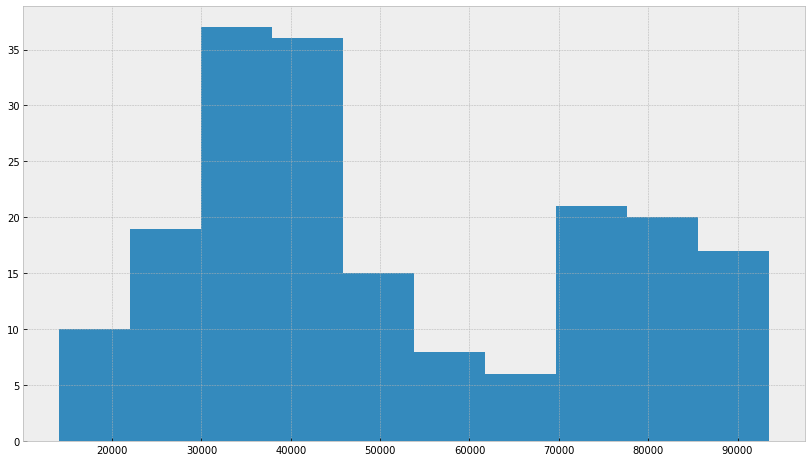

In [397]:
data_test['avg_deal_price'].hist(figsize=(14, 8))

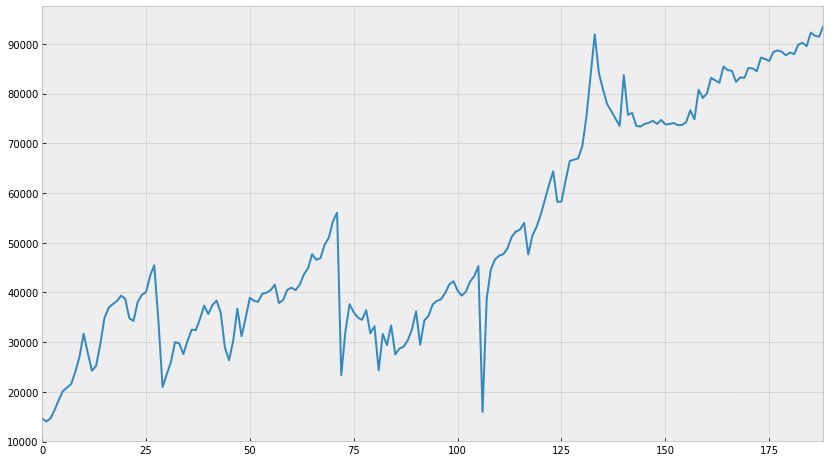

In [398]:
data_test['avg_deal_price'].plot(kind='line', figsize=(14, 8));

In [399]:
data_test['avg_deal_price'].value_counts()

28927    1
73872    1
80803    1
47700    1
44627    1
30033    1
55632    1
74830    1
35661    1
38054    1
30282    1
38728    1
92250    1
34887    1
14662    1
43333    1
47399    1
79099    1
35905    1
40518    1
76093    1
38460    1
74939    1
74075    1
34684    1
58227    1
80759    1
40053    1
38771    1
33394    1
        ..
84101    1
64367    1
23370    1
66946    1
41601    1
35317    1
58271    1
27040    1
73633    1
86946    1
40380    1
34491    1
33224    1
62559    1
38326    1
18357    1
45492    1
84572    1
34226    1
31665    1
85424    1
80020    1
29100    1
32425    1
20904    1
38311    1
25254    1
41637    1
32169    1
58625    1
Name: avg_deal_price, Length: 189, dtype: int64

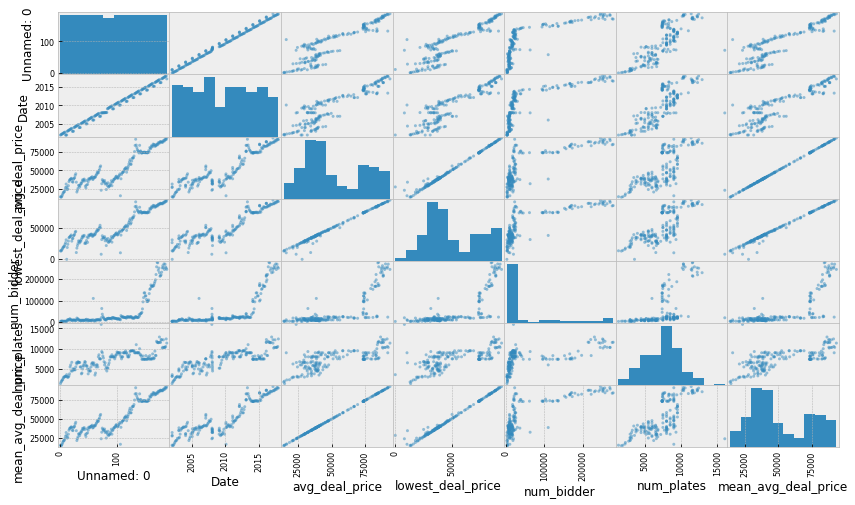

In [400]:
pd.plotting.scatter_matrix(data_test, figsize=(14, 8));

In [401]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,mean_avg_deal_price
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


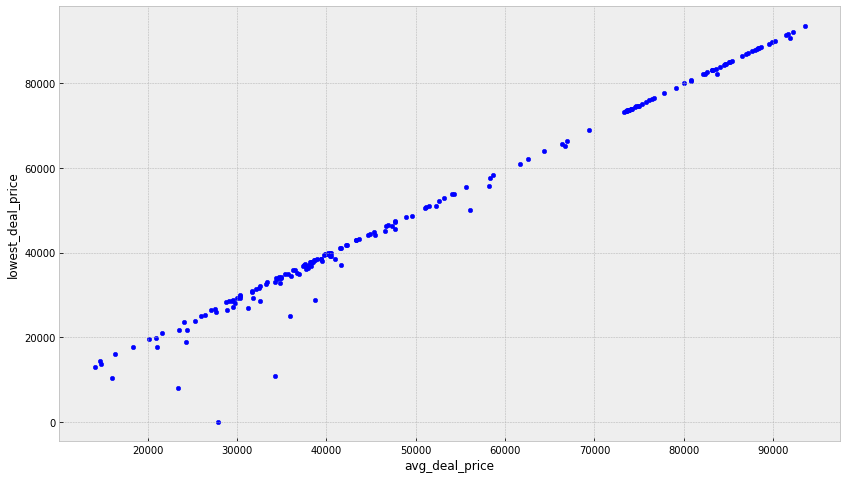

In [402]:
data_test.plot(x='avg_deal_price', y='lowest_deal_price', kind='scatter', figsize=(14, 8));

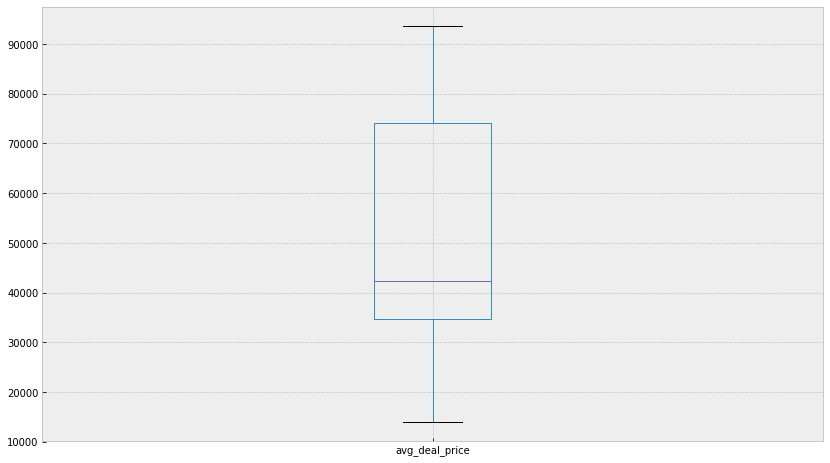

In [403]:
data_test['avg_deal_price'].plot(kind='box', figsize=(14, 8));

In [418]:
# fazer a limpeza da coluna inteira a ser retirada
data_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [429]:
data_test.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,date_time
0,2002.1,14735,13600,3718,1400,1970-01-01 00:00:00.000002002
1,2002.2,14057,13100,4590,1800,1970-01-01 00:00:00.000002002
2,2002.3,14662,14300,5190,2000,1970-01-01 00:00:00.000002002
3,2002.4,16334,16000,4806,2300,1970-01-01 00:00:00.000002002
4,2002.5,18357,17800,4665,2350,1970-01-01 00:00:00.000002002


In [430]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 6 columns):
Date                 189 non-null float64
avg_deal_price       189 non-null int64
lowest_deal_price    189 non-null int64
num_bidder           189 non-null int64
num_plates           189 non-null int64
date_time            189 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.3 KB


In [431]:
data_test.drop_duplicates(inplace=True)

In [432]:
data_test['date_time'] = pd.to_datetime(data_test['Date'])

In [433]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 6 columns):
Date                 189 non-null float64
avg_deal_price       189 non-null int64
lowest_deal_price    189 non-null int64
num_bidder           189 non-null int64
num_plates           189 non-null int64
date_time            189 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.3 KB


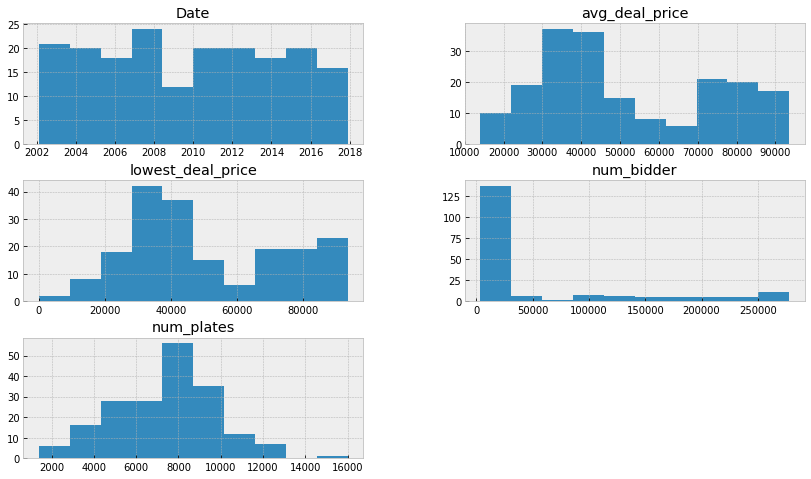

In [434]:
data_test.hist(figsize=(14, 8));

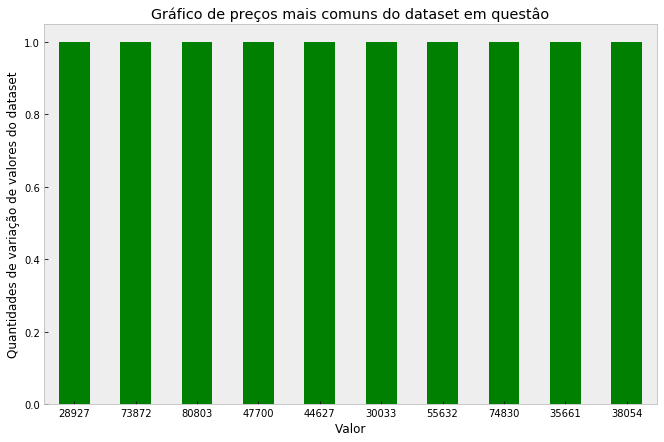

In [435]:
%matplotlib inline
# função para cria o gráfico de preços mais comuns do dataset
data_test['avg_deal_price'].value_counts().head(10).plot(kind='bar', figsize=(11,7), grid = False, rot=0, color='green')

# implementações de titulos para o gráfico
plt.title('Gráfico de preços mais comuns do dataset em questâo')
plt.xlabel('Valor')
plt.ylabel('Quantidades de variação de valores do dataset')
plt.show()

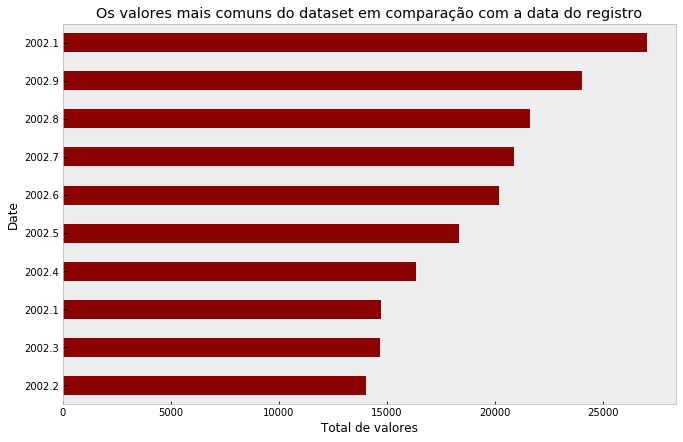

In [439]:
%matplotlib inline
price_date = data_test[['avg_deal_price', 'Date']].head(10).set_index('Date').sort_values('avg_deal_price', ascending=True)
price_date.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('Os valores mais comuns do dataset em comparação com a data do registro')
plt.xlabel('Total de valores')
plt.show()

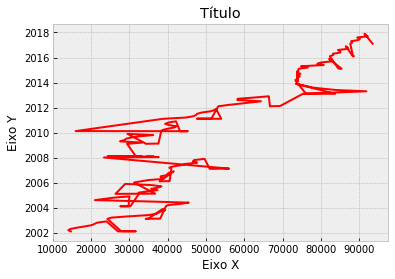

In [443]:
%matplotlib inline

x = data_test['avg_deal_price']
y = data_test['Date']

plt.plot(x, y, 'r') # 'r' é a cor vermelha (red)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Título')
plt.show()

In [444]:
data_test.head()

,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,date_time
0,2002.1,14735,13600,3718,1400,1970-01-01 00:00:00.000002002
1,2002.2,14057,13100,4590,1800,1970-01-01 00:00:00.000002002
2,2002.3,14662,14300,5190,2000,1970-01-01 00:00:00.000002002
3,2002.4,16334,16000,4806,2300,1970-01-01 00:00:00.000002002
4,2002.5,18357,17800,4665,2350,1970-01-01 00:00:00.000002002


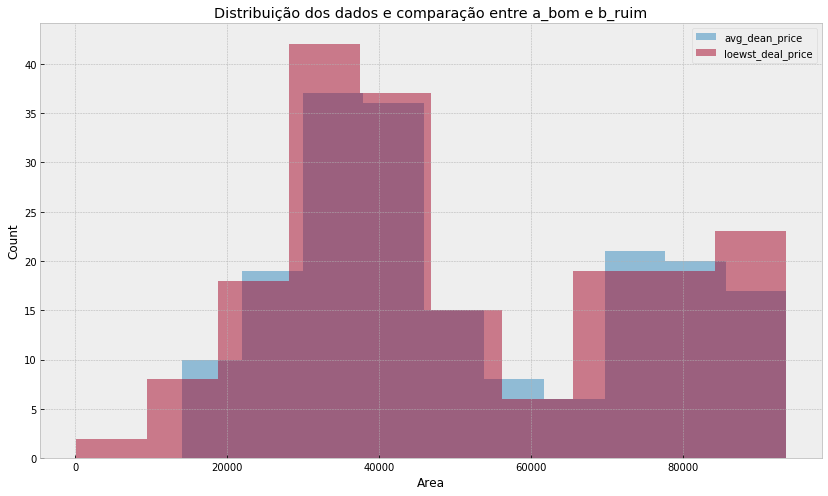

In [449]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(data_test['avg_deal_price'], alpha=0.5, label='avg_dean_price')
ax.hist(data_test['lowest_deal_price'], alpha=0.5, label='loewst_deal_price')
ax.set_title('Distribuição dos dados e comparação entre a_bom e b_ruim')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

In [453]:
# definições de estilo do seaborn
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### Implementando uma Regressão Linear

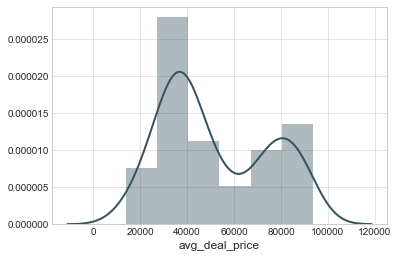

In [452]:
sns.distplot(data_test['avg_deal_price'])

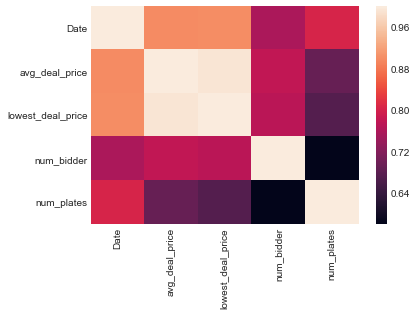

In [454]:
sns.heatmap(data_test.corr())

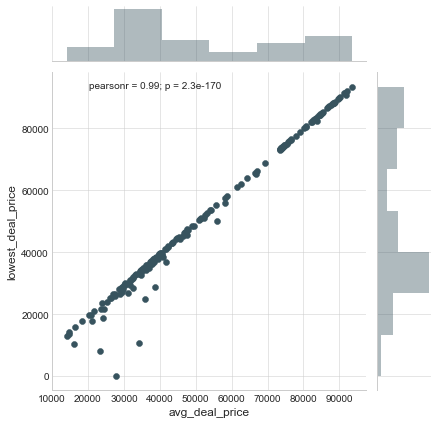

In [456]:
sns.jointplot(x='avg_deal_price', y='lowest_deal_price', data=data_test)

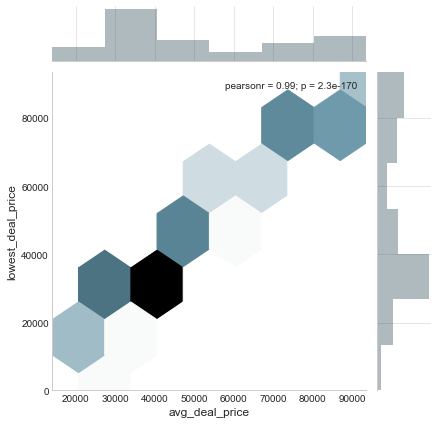

In [459]:
sns.jointplot(x='avg_deal_price', y='lowest_deal_price', kind='hex', data=data_test) 

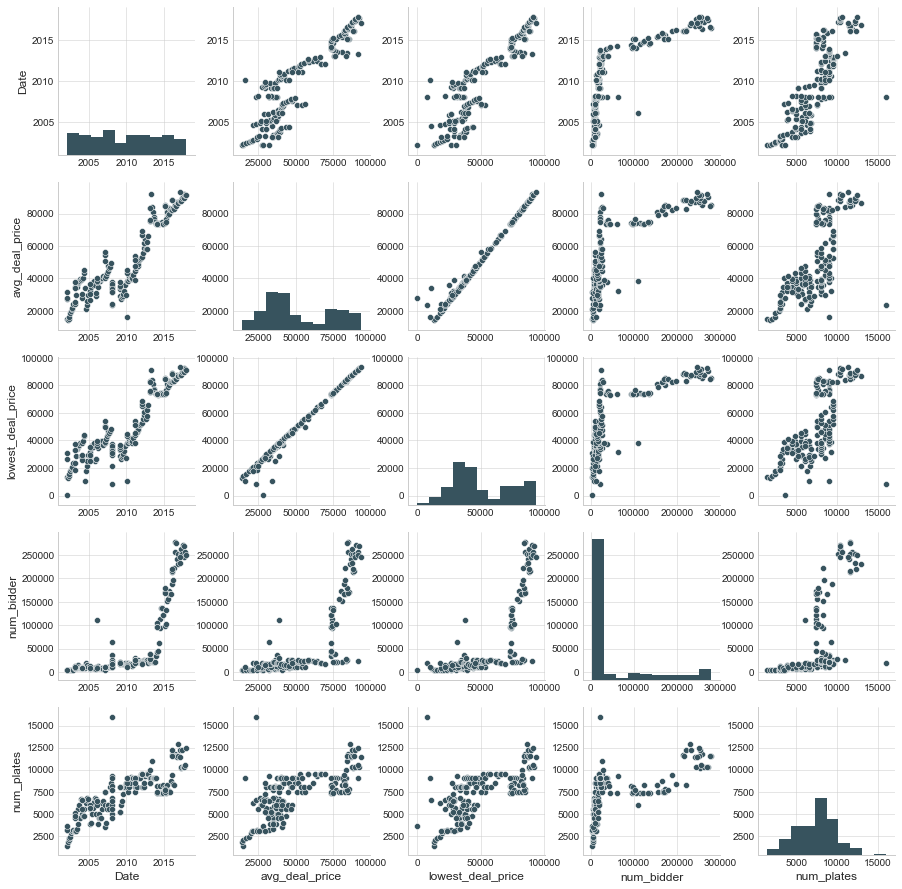

In [460]:
sns.pairplot(data_test, size=2.5, aspect=1)

In [242]:
y = data_test['avg_deal_price']
X = data_test[['Date']]

In [243]:
# importando a biblioteca do scikit learn para fazer o treinamento dos dados em dados de treinamento e dados de teste
from sklearn.model_selection import train_test_split

In [244]:
# treinando os dados em dados de treinamento e dados de dados
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.4,random_state=101)

In [245]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [246]:
# Printando a intercepção
print(lm.intercept_)

-8586820.29781


In [247]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Date,4297.874171


### Predições do modelo de machine learning

In [248]:
predictions = lm.predict(X_test)

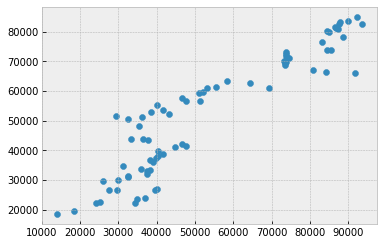

In [249]:
plt.scatter(y_test,predictions)

Text(0,0.5,'Predicted Y')

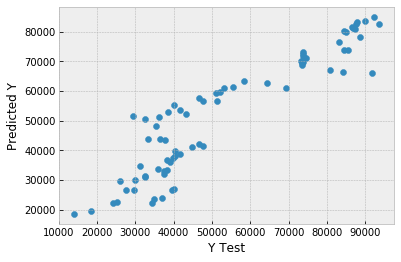

In [250]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Métricas de avaliação de regressão

Aqui estão três métricas de avaliação comuns para problemas de regressão:

Mean absolute error (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Square Error (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparando estas métricas:

MAE é o mais fácil de entender, porque é o erro médio.
MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
Todas estas são funções de perda , porque queremos minimizá-las.

In [251]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6926.35351442
MSE: 74863651.197
RMSE: 8652.37835494


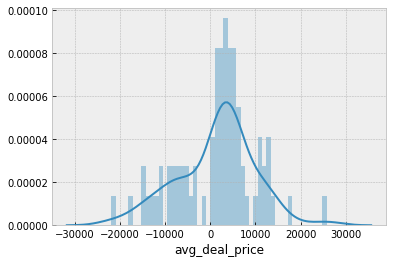

In [252]:
sns.distplot((y_test-predictions),bins=50);

## Testes com bibliotecas de Time Series Forecasting

### Implementação de uma tabela de valores aleatórios para geração de uma decomposição

In [253]:
df = pd.DataFrame(np.random.random((500,5)))
df.index = pd.DatetimeIndex(freq="w", start=0, periods=500)
df.head(3)

,0,1,2,3,4
1970-01-04,0.395158,0.587950,0.336848,0.856101,0.744053
1970-01-11,0.275418,0.047212,0.969051,0.536452,0.053446
1970-01-18,0.241563,0.511062,0.986061,0.181791,0.180059


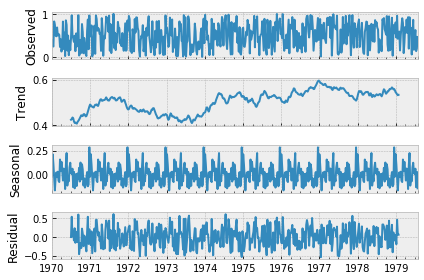

In [254]:
decomp = sm.tsa.seasonal_decompose(df[0])
decomp.plot()
plt.show()

### Testando uma implementação da Decomposição no dataset do projeto

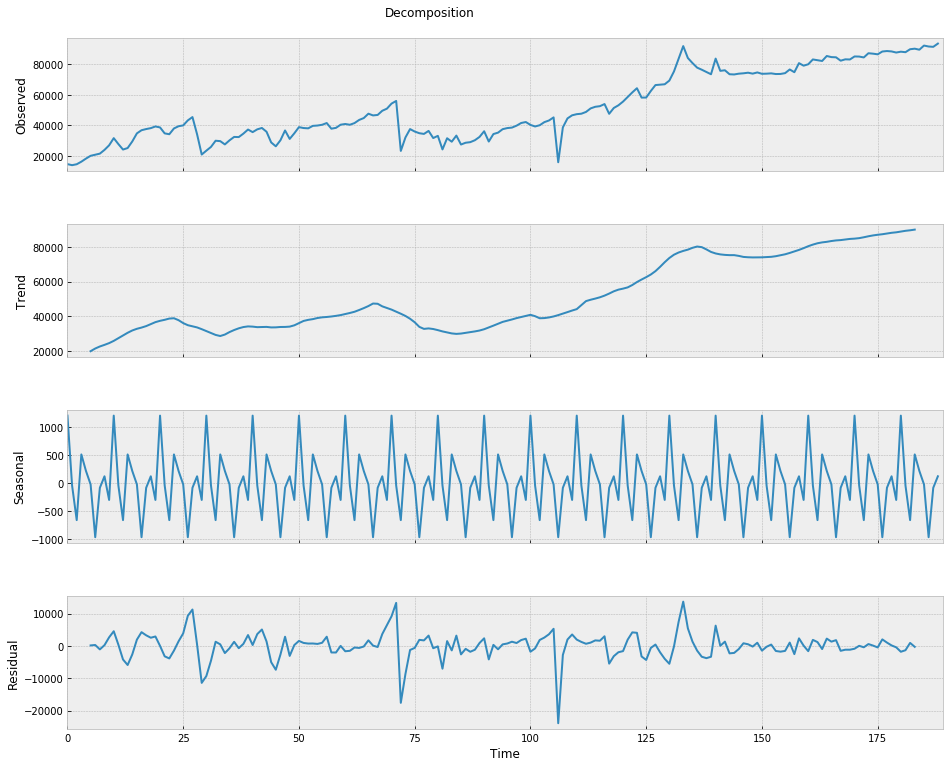

In [257]:
# importação das bibliotecas do statsmodels, uma das bibliotecas principais envolvidas no forecasting
import statsmodels.api as sm
import statsmodels
import statsmodels.graphics as graf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# criação da variavel forecasting para ser a base dos gráficos
forecasting = data_test['avg_deal_price']

# criação da variavel decomposition
decomposition = sm.tsa.seasonal_decompose(np.asarray(forecasting), freq=10)

# definir os output dos gráficos como arquivos internos
%matplotlib inline

# definições dos gráficos que serão o output
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(12)
fig.suptitle('Decomposition')
plt.show()

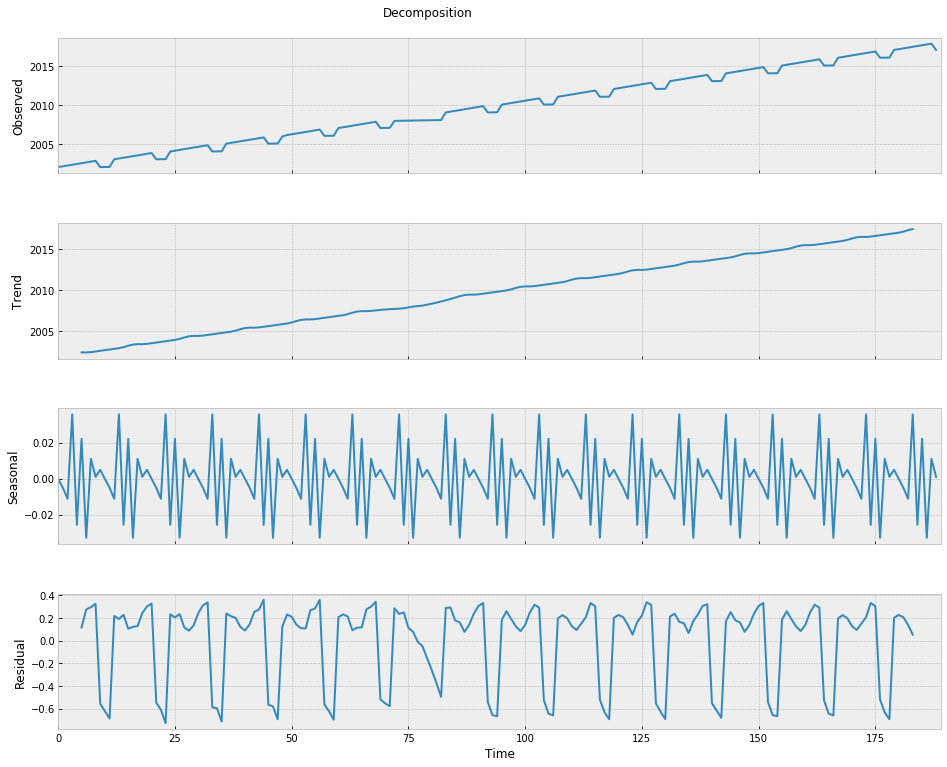

In [258]:
# importação das bibliotecas do statsmodels, uma das bibliotecas principais envolvidas no forecasting
import statsmodels.api as sm
import statsmodels
import statsmodels.graphics as graf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# criação da variavel forecasting para ser a base dos gráficos
forecasting = data_test['Date']

# criação da variavel decomposition
decomposition = sm.tsa.seasonal_decompose(np.asarray(forecasting), freq=10)

# definir os output dos gráficos como arquivos internos
%matplotlib inline

# definições dos gráficos que serão o output
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(12)
fig.suptitle('Decomposition')
plt.show()

In [259]:
data_test.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates,test_forecasting
0,0,2002.1,14735,13600,3718,1400,14735
1,1,2002.2,14057,13100,4590,1800,14057
2,2,2002.3,14662,14300,5190,2000,14662
3,3,2002.4,16334,16000,4806,2300,16334
4,4,2002.5,18357,17800,4665,2350,18357


In [260]:
# doc com as funções do seasonal_decompose
print (sm.tsa.seasonal_decompose.__doc__)


    Seasonal decomposition using moving averages

    Parameters
    ----------
    x : array-like
        Time series
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not  a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If False, the filter coefficients are for past values only.

    Returns
    -------
    results : obj
        A object with seasonal, trend, and resid attributes.

    Notes
    -----
    This is a naive decomposition. 

In [268]:
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis em Boston
data = pd.read_csv('license_plates_acution_data.csv')
prices = data['avg_deal_price']
features = data.drop('avg_deal_price', axis = 1)
    
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

data.head()

O conjunto de dados de imóveis de Boston tem 189 pontos com 6 variáveis em cada.


,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [271]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $14,057.00
Preço máximo: $93,540.00
Preço médio: $51,632.87
Preço mediano: $42,262.00
Desvio padrão dos preços: $22,488.64


C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


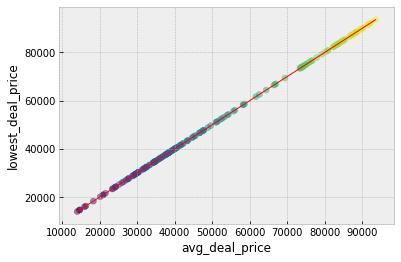

In [272]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
pt_ratio = data['avg_deal_price'].reshape(-1,1)
reg.fit(pt_ratio, prices)
plt.plot(pt_ratio, reg.predict(pt_ratio), color='red', linewidth=1)
plt.scatter(pt_ratio, prices, alpha=0.5, c=prices)
plt.xlabel('avg_deal_price')
plt.ylabel('lowest_deal_price')
plt.show()

In [273]:
def performance_metric(y_true, y_predict):
    """Calcular e retornar a pontuação de desempenho entre
    valores reais e estimados baseado na métrica escolhida."""
    
    # Importar o 'r2_score'
    from sklearn.metrics import r2_score
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

In [274]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


In [276]:
from sklearn.model_selection import train_test_split  

# Misturar e separar os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


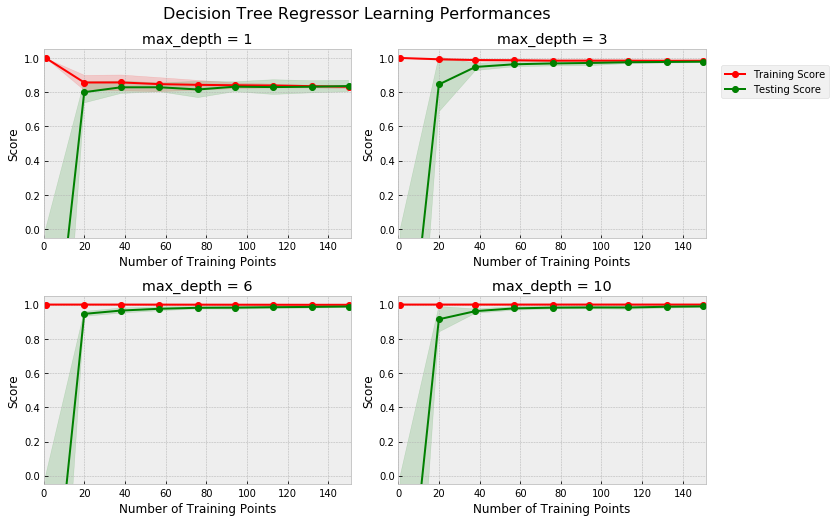

In [283]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e produnfidades máximas
vs.ModelLearning(features, prices)

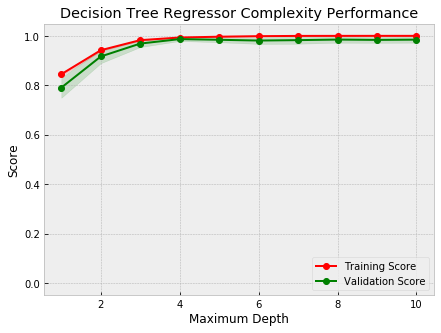

In [284]:
# Criar curva de complexidade para entender sobre os dados em max_depth diferentes
vs.ModelComplexity(x_train, y_train)

In [286]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """Desempenhar busca em matriz sobre o parâmetro 'max_depth' para uma
    árvore de decisão de regressão treinada nos dados de entrada [x, y]"""
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor(random_state=0)
    
    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': range(1,11)}
    
    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
     # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets, verbose=0)
    
    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)
    
    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

In [288]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
# reg = fit_model(x_train, y_train)
# Produzir valores para 'max_depth'
# print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

In [292]:
data.head()

,Unnamed: 0,Date,avg_deal_price,lowest_deal_price,num_bidder,num_plates
0,0,2002.1,14735,13600,3718,1400
1,1,2002.2,14057,13100,4590,1800
2,2,2002.3,14662,14300,5190,2000
3,3,2002.4,16334,16000,4806,2300
4,4,2002.5,18357,17800,4665,2350


In [316]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15, 4, 32], [10, 19, 8, 3, 10], [8, 3, 12, 21, 12]]

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print("Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price))

In [317]:
from matplotlib import pyplot as plt

clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i, feat in enumerate(['avg_deal_price', 'lowest_deal_price', 'Date']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()

ValueError: shapes (3,5) and (1,) not aligned: 5 (dim 1) != 1 (dim 0)

In [461]:
data_test.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            179, 180, 181, 182, 183, 184, 185, 186, 187, 188],
           dtype='int64', length=189)

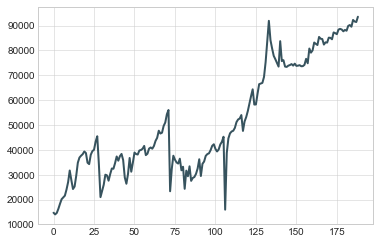

In [463]:
ts = data_test['avg_deal_price']
plt.plot(ts)

In [464]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


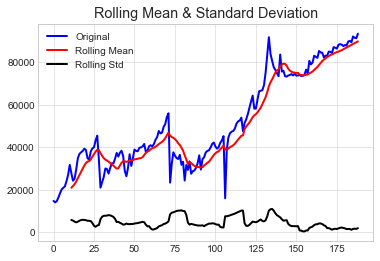

Results of Dickey-Fuller Test:
Test Statistic                  -0.694658
p-value                          0.848128
#Lags Used                       3.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


In [465]:
test_stationarity(ts)

### Estimando e elimando a tendência

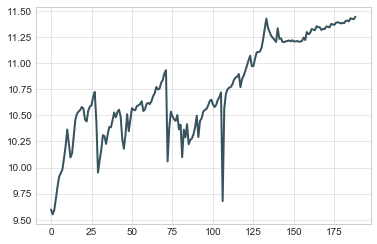

In [466]:
ts_log = np.log(ts)
plt.plot(ts_log)

### Determinar a média móvel

Nessa abordagem, consideramos a média de valores consecutivos ‘K’, dependendo da frequência de séries temporais. Aqui nós podemos tomar a média dos últimos 1 ano, ou seja últimos 12 valores.

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


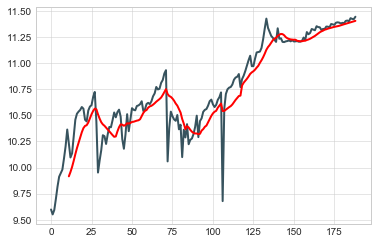

In [467]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [468]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.318435
Name: avg_deal_price, dtype: float64

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


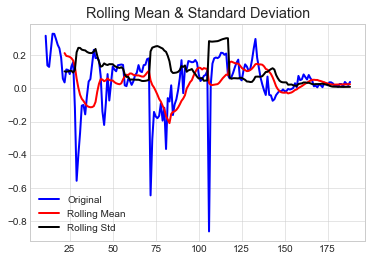

Results of Dickey-Fuller Test:
Test Statistic                -7.091894e+00
p-value                        4.388437e-10
#Lags Used                     0.000000e+00
Number of Observations Used    1.770000e+02
Critical Value (1%)           -3.467845e+00
Critical Value (5%)           -2.878012e+00
Critical Value (10%)          -2.575551e+00
dtype: float64


In [469]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


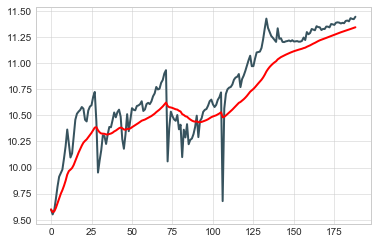

In [470]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


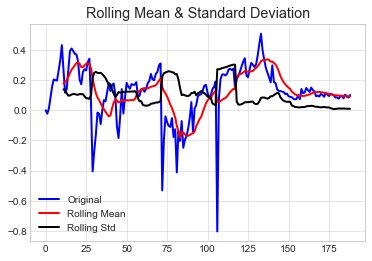

Results of Dickey-Fuller Test:
Test Statistic                  -3.468516
p-value                          0.008833
#Lags Used                       3.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


In [471]:
ts_log_ewma_diff = ts_log - expwighted_avg 
test_stationarity(ts_log_ewma_diff)

## Eliminando as tendências e sazonalidade

### 1 - Diferencação

Um dos métodos mais comuns de lidar tanto com tendência quanto sazonalidade é diferenciação. Nessa técnica, tomamos a diferença de observação em um instante particular com a do instante anterior.  Isso funciona particularmente bem para stationarity crescente. 

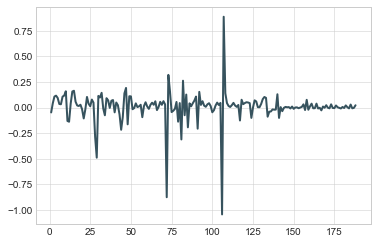

In [472]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


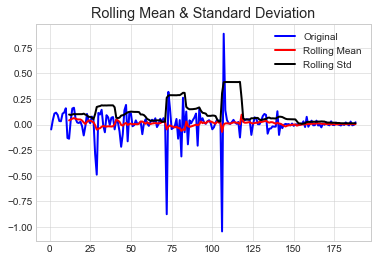

Results of Dickey-Fuller Test:
Test Statistic                -1.113512e+01
p-value                        3.209714e-20
#Lags Used                     2.000000e+00
Number of Observations Used    1.850000e+02
Critical Value (1%)           -3.466201e+00
Critical Value (5%)           -2.877293e+00
Critical Value (10%)          -2.575168e+00
dtype: float64


In [473]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

###  2 - Decomposição

Nesta abordagem, tanto tendência quanto sazonalidade são modeladas separadamente e a parte restante da série é devolvida. Vou pular as estatísticas e vou direto para os resultados:

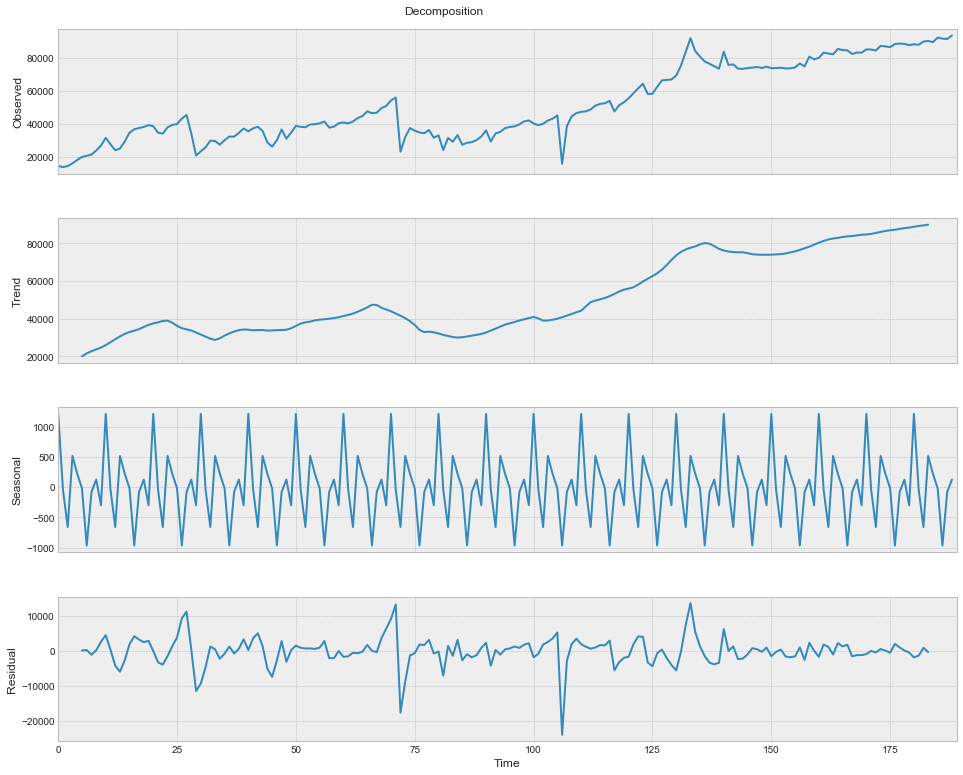

In [482]:
# criação da variavel forecasting para ser a base dos gráficos
forecasting = data_test['avg_deal_price']

# criação da variavel decomposition
decomposition = sm.tsa.seasonal_decompose(np.asarray(forecasting), freq=10)

# definições dos gráficos que serão o output
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(12)
fig.suptitle('Decomposition')
plt.show()

In [485]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.subplot(411) 
plt.plot(ts_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

In [483]:
ts_log_decompose = residual 
ts_log_decompose.dropna(inplace=True) 
test_stationarity(ts_log_decompose)

NameError: name 'residual' is not defined

In [480]:
print(sm.tsa.seasonal_decompose.__doc__)


    Seasonal decomposition using moving averages

    Parameters
    ----------
    x : array-like
        Time series
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not  a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If False, the filter coefficients are for past values only.

    Returns
    -------
    results : obj
        A object with seasonal, trend, and resid attributes.

    Notes
    -----
    This is a naive decomposition. 

# Referências:

https://bibliotecadigital.ipb.pt/bitstream/10198/12709/1/Artur%20Jorge%20Ferreira%20da%20Costa%20Dias.pdf

http://www.redalyc.org/pdf/3291/329147536007.pdf

http://www.ceel.eletrica.ufu.br/artigos/ceel2016_artigo094_r01.pdf

https://repositorio.bc.ufg.br/tede/bitstream/tede/7563/5/Disserta%C3%A7%C3%A3o%20-%20Ricardo%20Henrique%20Fonseca%20Alves%20-%202017.pdf

http://ftp.cptec.inpe.br/labren/publ/teses/DISSERTACAO_RICARDO-GUARNIERI.pdf

http://www.confea.org.br/media/contecc2017/eletrica/1_audrnanpdrsg.pdf

http://www.inovarse.org/sites/default/files/T14_0291_5.pdf

http://www.redalyc.org/html/3291/329147536007/

https://repositorio.ufu.br/handle/123456789/14569

https://repositorio.ufsc.br/bitstream/handle/123456789/178026/TCC_Final_Jhuan_Souza.pdf?sequence=1&isAllowed=y

https://www.producaoonline.org.br/rpo/article/view/2542/1596

revistas.ufpr.br/rber/article/download/48431/pdf

https://pt.stackoverflow.com/questions/192098/como-funciona-uma-rede-neural-artificial

https://martin-thoma.com/classification-with-pybrain/

http://conteudo.icmc.usp.br/pessoas/andre/research/neural/

http://www.din.uem.br/ia/neurais/

http://www.cerebromente.org.br/n05/tecnologia/rna.htm

ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia006_03/topico5_03.pdf

http://www2.dbd.puc-rio.br/pergamum/tesesabertas/0016231_04_cap_05.pdf

https://www.embarcados.com.br/redes-neurais-artificiais-introducao/

https://periodicos.utfpr.edu.br/recit/article/view/4330/Leandro

http://www2.ica.ele.puc-rio.br/Downloads/33/ICA-introdu%C3%A7%C3%A3o%20RNs.pdf

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1982-21702017000100150&lng=pt&tlng=pt

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

https://www.monolitonimbus.com.br/processos-estacionarios/

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

http://www.portalaction.com.br/series-temporais/11-estacionariedade

http://www.icad.puc-rio.br/cfeijo/pdf/revis%C3%A3o%20b%C3%A1sica%20s%C3%A9ries%20temporais_material%20de%20apoio_curso%20teoria%20macroeconomica_PPGE%20UFF.pdf

https://www.ime.unicamp.br/~hlachos/MaterialSeries.pdf

http://www.inf.ufsc.br/~marcelo.menezes.reis/Cap4.pdf

https://www.researchgate.net/publication/229040330_JTIMESAT_uma_ferramenta_para_a_visualizacao_de_series_temporais_de_imagens_de_satelite

http://bdm.unb.br/bitstream/10483/7239/1/2013_JoseRobertoGoncalvesdeRezendeFilho.pdf

https://www.maxwell.vrac.puc-rio.br/16824/16824_4.PDF

https://www.maxwell.vrac.puc-rio.br/24787/24787_4.PDF

http://conteudo.icmc.usp.br/pessoas/ehlers/stemp/stemp.pdf

http://cdsid.org.br/sbpo2015/wp-content/uploads/2015/08/140250.pdf

https://www.marinha.mil.br/spolm/sites/www.marinha.mil.br.spolm/files/101711_0.pdf

https://www.lume.ufrgs.br/bitstream/handle/10183/31034/000782115.pdf?sequence=1

http://www2.ufersa.edu.br/portal/view/uploads/setores/232/TCC%20-%20VALCIANO%20CAMILO%20GURGEL.pdf

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1982-21702017000100150&lng=pt&tlng=pt

http://www.ime.eb.br/arquivos/teses/se4/mec2008/2008Bianca.pdf

http://repositorio.unicamp.br/bitstream/REPOSIP/267746/1/Conti_JoseCarlos_M.pdf

http://www.ctec.ufal.br/professor/cfs/Sul_Sud06%20-%20Series.pdf

http://pdf.blucher.com.br.s3-sa-east-1.amazonaws.com/marineengineeringproceedings/spolm2015/140011.pdf

http://www.portalaction.com.br/series-temporais/15-modelos-para-series-temporais

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://www.researchgate.net/publication/289479535_Previsao_de_energia_eletrica_modelagem_e_uso_de_combinacoes_de_previsoes

https://www.ufrgs.br/sbai17/papers/paper_506.pdf

http://www.scielo.org.co/pdf/eia/n26/en_n26a09.pdf

http://www.sciencedirect.com/science/article/pii/S1877050915015641

http://www.uff.br/engevista/seer/index.php/engevista/article/viewFile/433/236

http://www.ufjf.br/pgmc/files/2011/05/Disserta%C3%A7%C3%A3o-Guilherme-G-Neto-18-08.pdf

http://www.exatas.ufpr.br/portal/degraf_paulo/wp-content/uploads/sites/4/2014/09/EE022-08-08.pdf

http://www.datascienceinstitute.com.br/forecast-de-consumo-de-energia-eletrica/

https://docs.microsoft.com/pt-br/azure/machine-learning/preview/scenario-time-series-forecasting

https://translate.google.com.br/translate?sl=en&tl=pt&js=y&prev=_t&hl=pt-BR&ie=UTF-8&u=http%3A%2F%2Fwww.scielo.br%2Fscielo.php%3Fscript%3Dsci_arttext%26pid%3DS1678-86212017000300103%26lng%3Dpt%26tlng%3Dpt&edit-text=

http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1678-86212017000300103&lng=pt&tlng=pt

http://acervo.ufvjm.edu.br/jspui/bitstream/1/1327/1/rodrigo_magalhaes_mota_santos.pdf

http://tede2.pucgoias.edu.br:8080/bitstream/tede/2484/1/Paulo%20Henrique%20Borba%20Florencio.pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.29.4455&rep=rep1&type=pdf

https://gab41.lab41.org/the-10-algorithms-machine-learning-engineers-need-to-know-f4bb63f5b2fa

http://minerandodados.com.br/index.php/2017/05/19/prevendo-precos-de-acoes-da-bolsa-de-valores-com-machine-learning/

https://fga.unb.br/articles/0000/5556/TCC_Hialo_Muniz.pdf

http://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/pos-graduacao/327-dissertacao_ciceromarcelo.pdf

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

http://www.semantix.com.br/10-algoritmos-de-machine-learning/

http://www.scielo.br/scielo.php?pid=S1678-86212017000300103&script=sci_arttext

https://fga.unb.br/articles/0000/7804/TCC_Hialo_Muniz.pdf

http://www.leec.eco.br/downloads/R-tutorial-de-bolso.pdf